# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Linrui Li
**Email:** ll5566@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

**Proposed Split Strategy**

To ensure that the model generalizes to new speakers, the dataset should be split at the speaker level. I would divide the 100 speakers as follows:

Training set: 80 speakers

Validation set: 10 speakers

Test set: 10 speakers

Each speaker appears in only one split, and all of their recordings (across all days and phones) remain within that split. This prevents the model from memorizing speaker-specific characteristics and ensures that test performance reflects true generalization to unseen identities.

**Handling the additional 10,000 recordings from Kilian**

I would treat Kilian as a separate personalization task while preserving the model’s overall generalization ability.

**Step 1 — Train a base model**

Train on the original 100 speakers using the speaker-disjoint split above.

Do not include Kilian during this stage.

**Step 2 — Personalize for Kilian**

Split Kilian’s 10,000 recordings into:

70% for Kilian-train

10% for Kilian-validation

20% for Kilian-test

Fine-tune or adapt the base model using Kilian-train.

Use Kilian-validation to prevent overfitting.

Evaluate the personalized model on Kilian-test.

This two-stage approach maintains strong speaker-independent generalization while achieving high performance specifically for Kilian through targeted adaptation.

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


**1. 1-NN Classification**

For the given dataset:

* Positive: (1,2), (1,4), (5,4)
* Negative: (3,1), (3,2)

The 1-NN decision boundary consists of the perpendicular bisectors between each pair of nearest positive and negative points. Visually, the space is divided into regions where each location is classified according to the closest labeled point. Any new point will be assigned the label of its nearest neighbor in this diagram.

**2. Effect of Feature Scaling**

Dataset:

* Positive: (100,2), (100,4), (500,4)
* Negative: (300,1), (300,2)

**Before scaling:**
The distance is dominated by the **first feature**, since values range from 100 to 500.
For the point **(500,1)**:

* Its nearest neighbor is **(500,4)** (positive).
  → **Predicted label: Positive**

**After scaling each feature to [0,1]:**
The first feature shrinks dramatically, and the distance contribution from the second feature becomes more significant.
Under scaling, the point (500,1) becomes much closer to **(300,1)** or **(300,2)** (negative).
→ **Predicted label: Negative**

**3. Handling Missing Features in K-NN**

To handle missing features in a test point, K-NN can be modified by:

* Computing distance **only over the dimensions that are present**, or
* Imputing missing values (mean/median of the feature), or
* Using a distance metric that **weights available dimensions**, such as normalized Euclidean distance based on observed features.

These approaches allow K-NN to still compare points meaningfully even when some features are missing.

**4. Why K-NN Can Work for High-Dimensional Images**

Even though images have thousands of pixels, K-NN can still work well because:

* Image data has strong **local and spatial structure**, making Euclidean distance meaningful.
* High-dimensional image vectors often lie on a **lower-dimensional manifold**, so nearest neighbors remain informative.
* With enough training examples, nearby images in pixel space tend to correspond to visually similar objects.

Thus, despite high dimensionality, K-NN can still achieve good performance on image datasets.

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

1. Yes.Evaluating the classifier on both datasets allows us to directly compare the predicted labels with their true labels. If the number of mistakes on 𝐷_TE is larger than on D_TR, then the test error is higher. So computing predictions on both sets does indeed help determine the difference between training and test error.
2. There is no need to compute training error because the Perceptron algorithm guarantees zero training error at convergence as long as the data is linearly separable.
The algorithm only stops when it can pass through the entire training set without making any mistakes. Therefore, by design, the final Perceptron model always achieves 0 training error, so computing it explicitly is unnecessary.

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [1]:
import numpy as np

# Data
X = np.array([
    [10, -2],   # positive
    [12, 2]     # negative
])
y = np.array([1, -1])

# Perceptron
w = np.zeros(2)
updates = 0

while True:
    error_found = False
    for xi, yi in zip(X, y):
        if yi * np.dot(w, xi) <= 0:
            w = w + yi * xi
            updates += 1
            error_found = True
            print(f"Update {updates}: w = {w}")
    if not error_found:
        break

Update 1: w = [10. -2.]
Update 2: w = [-2. -4.]
Update 3: w = [ 8. -6.]
Update 4: w = [-4. -8.]
Update 5: w = [  6. -10.]
Update 6: w = [ -6. -12.]
Update 7: w = [  4. -14.]
Update 8: w = [ -8. -16.]
Update 9: w = [  2. -18.]


### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

w0 = (0, 0, 0, 0, 0)

After applying each update:

1. (0, 0, 0, 0, 4), y = +1, count = 2
   w = (0, 0, 0, 0, 8)

2. (0, 0, 6, 5, 0), y = +1, count = 1
   w = (0, 0, 6, 5, 8)

3. (3, 0, 0, 0, 0), y = -1, count = 1
   w = (-3, 0, 6, 5, 8)

4. (0, 9, 3, 6, 0), y = -1, count = 1
   w = (-3, -9, 3, -1, 8)

5. (0, 1, 0, 2, 5), y = -1, count = 1
   w = (-3, -10, 3, -3, 3)

Final answer:
w_final = (-3, -10, 3, -3, 3)

### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

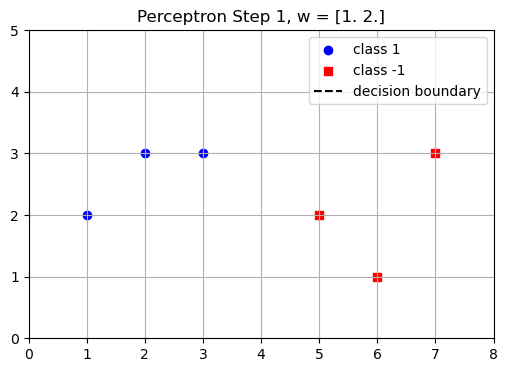

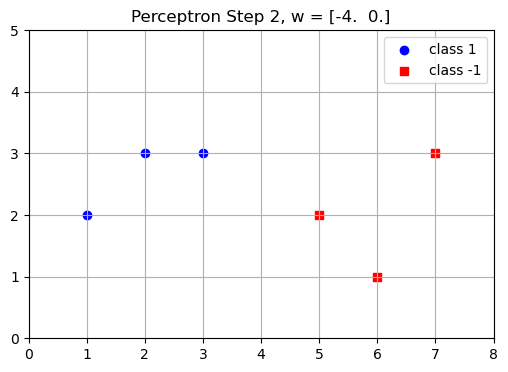

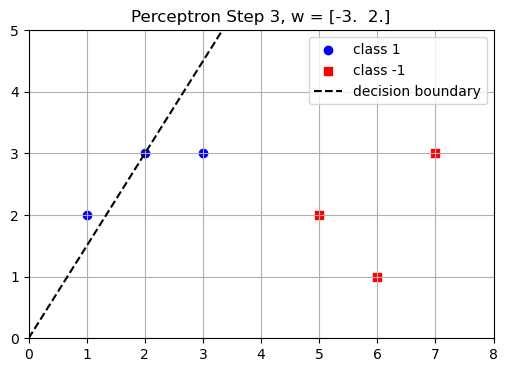

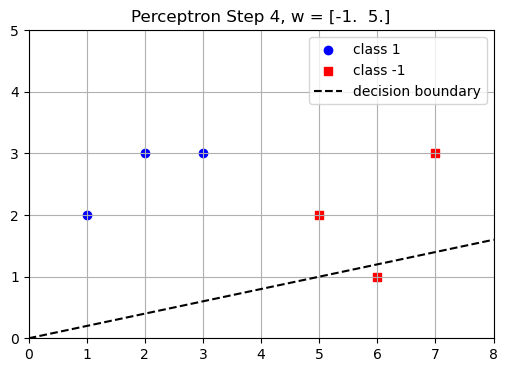

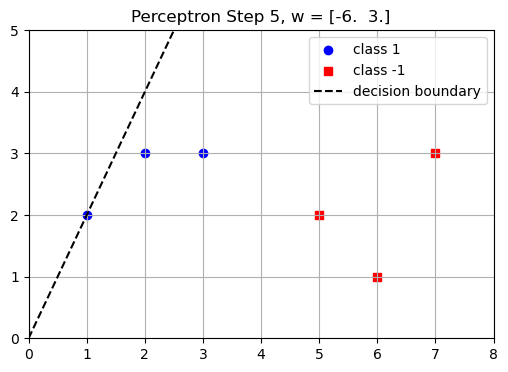

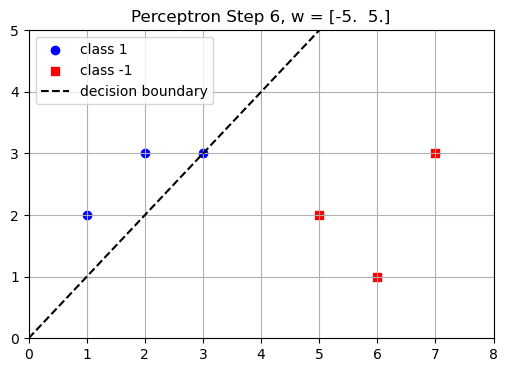

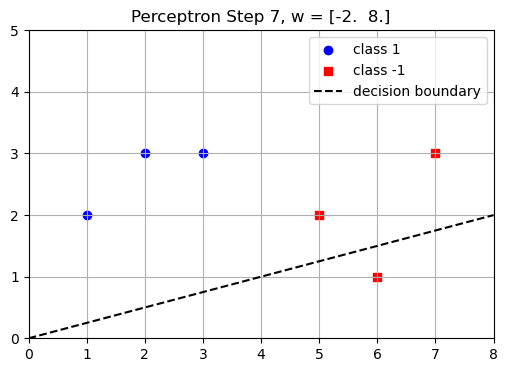

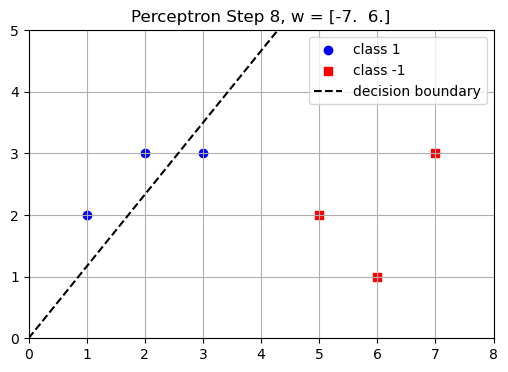

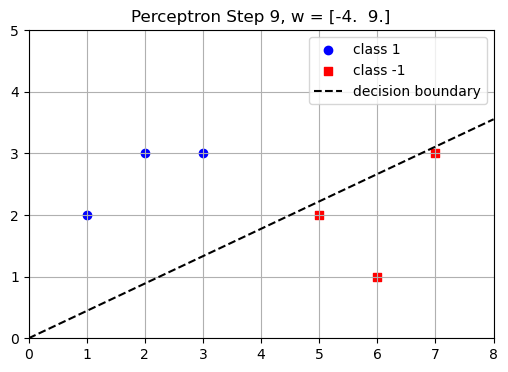

Final weight: [-4.  9.]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X = np.array([
    [1, 2],
    [2, 3],
    [3, 3],
    [5, 2],
    [6, 1],
    [7, 3]
])

y = np.array([1, 1, 1, -1, -1, -1])   # +1 and -1 labels

def plot_step(w, X, y, step):
    plt.figure(figsize=(6, 4))
    
    # Plot data points
    for label, marker, color in [(1, 'o', 'blue'), (-1, 's', 'red')]:
        plt.scatter(X[y == label, 0], X[y == label, 1],
                    marker=marker, color=color, label=f"class {label}")
    
    # If w is nonzero, plot boundary
    if not np.all(w == 0):
        x_vals = np.linspace(0, 8, 100)
        # Decision boundary: w1*x + w2*y = 0 => y = -(w1/w2)*x
        if w[1] != 0:
            y_vals = -(w[0] / w[1]) * x_vals
            plt.plot(x_vals, y_vals, 'k--', label="decision boundary")

    plt.title(f"Perceptron Step {step}, w = {w}")
    plt.xlim(0, 8)
    plt.ylim(0, 5)
    plt.legend()
    plt.grid(True)
    plt.show()
w = np.zeros(2)
step = 0

for epoch in range(10):   # enough iterations to converge
    for xi, yi in zip(X, y):
        if yi * np.dot(w, xi) <= 0:
            w = w + yi * xi     # update rule
            step += 1
            plot_step(w, X, y, step)

print("Final weight:", w)
